In [14]:
import os
import networkx as nx
import matplotlib.pyplot as plt

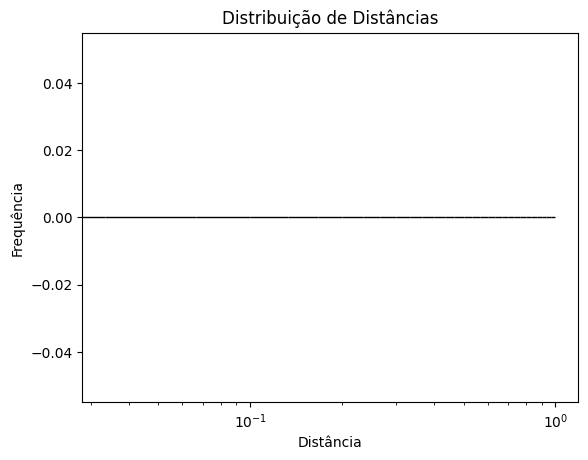

In [8]:
# Defina o caminho para a pasta 'gml'
folder_path = '/home/junior/Downloads/N_5000/dim_1/alpha_a_3.0_alpha_g_8.0/gml'

# Lista para armazenar todas as distâncias
all_distances = []

# Itera sobre todos os arquivos na pasta 'gml'
for filename in os.listdir(folder_path):
    if filename.endswith(".gml"):
        file_path = os.path.join(folder_path, filename)
        
        # Carrega o arquivo GML usando networkx
        try:
            graph = nx.read_gml(file_path)
            
            # Itera sobre todas as arestas para coletar as distâncias
            for u, v, data in graph.edges(data=True):
                if 'distance' in data:
                    all_distances.append(data['distance'])
        except Exception as e:
            print(f"Erro ao processar {filename}: {e}")

# Plota a distribuição das distâncias
plt.hist(all_distances, bins=30, edgecolor='black')
plt.title('Distribuição de Distâncias')
plt.xlabel('Distância')
plt.ylabel('Frequência')
plt.xscale("log")
plt.show()

99999 distâncias encontradas no arquivo gml_232359316.gml.gz
99999 distâncias encontradas no arquivo gml_2057826458.gml.gz
99999 distâncias encontradas no arquivo gml_66728102.gml.gz
99999 distâncias encontradas no arquivo gml_1577136543.gml.gz
99999 distâncias encontradas no arquivo gml_880113222.gml.gz
99999 distâncias encontradas no arquivo gml_2051374209.gml.gz
99999 distâncias encontradas no arquivo gml_1076027234.gml.gz
99999 distâncias encontradas no arquivo gml_953097417.gml.gz
99999 distâncias encontradas no arquivo gml_1974293811.gml.gz
99999 distâncias encontradas no arquivo gml_2070895507.gml.gz
99999 distâncias encontradas no arquivo gml_60262681.gml.gz
99999 distâncias encontradas no arquivo gml_1348258707.gml.gz
99999 distâncias encontradas no arquivo gml_14990738.gml.gz
99999 distâncias encontradas no arquivo gml_657343249.gml.gz
99999 distâncias encontradas no arquivo gml_1243398578.gml.gz
99999 distâncias encontradas no arquivo gml_1771067131.gml.gz
99999 distâncias e

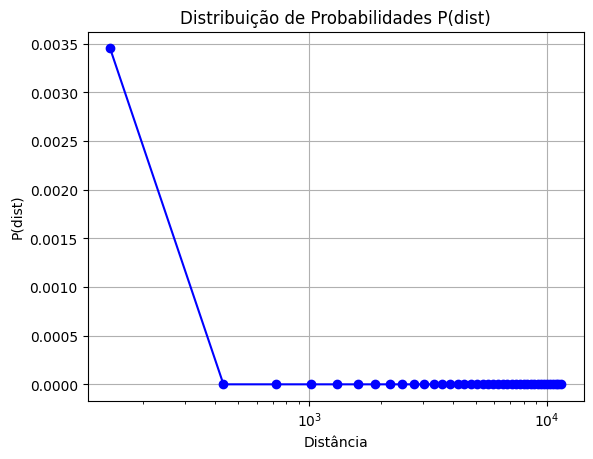

In [1]:
import os
import gzip
import re
import numpy as np
import matplotlib.pyplot as plt

# Defina o caminho para a pasta 'gml'
#folder_path = '/home/junior/Downloads/N_160000/dim_1/alpha_a_2.0_alpha_g_2.0/gml'
folder_path = '../../data/N_100000/dim_1/alpha_a_0.00_alpha_g_2.00/gml'

# Regex para encontrar o valor da distância
distance_pattern = re.compile(r'distance\s([\d\.]+)')

# Lista para armazenar todas as distâncias
all_distances = []

# Itera sobre todos os arquivos na pasta 'gml'
for filename in os.listdir(folder_path):
    if filename.endswith(".gz"):  # Verifica se o arquivo é .gz
        file_path = os.path.join(folder_path, filename)
        
        # Descompacta o arquivo e lê o conteúdo
        try:
            with gzip.open(file_path, 'rt') as file:
                content = file.read()
                
                # Encontra todas as ocorrências de distâncias no arquivo
                distances = distance_pattern.findall(content)
                all_distances.extend([float(d) for d in distances])  # Adiciona as distâncias encontradas
                print(f"{len(distances)} distâncias encontradas no arquivo {filename}")
                
        except Exception as e:
            print(f"Erro ao processar {filename}: {e}")

# Após a leitura, verifica quantas distâncias foram coletadas
print(f"Total de distâncias coletadas: {len(all_distances)}")

# Se distâncias foram encontradas, calculamos a distribuição P(dist)
if all_distances:
    # Cria os bins (intervalos) para as distâncias
    num_bins = 40
    counts, bin_edges = np.histogram(all_distances, bins=num_bins, density=True)

    # Calcula os valores centrais de cada bin
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Plota a distribuição de probabilidades P(dist)
    plt.plot(bin_centers, counts, marker='o', linestyle='-', color='b')
    plt.title('Distribuição de Probabilidades P(dist)')
    plt.xlabel('Distância')
    plt.ylabel('P(dist)')
    plt.xscale("log")
    #plt.yscale("log")
    plt.grid(True)
    plt.show()
else:
    print("Nenhuma distância foi encontrada.")


159999 distâncias encontradas no arquivo gml_555778795.gml.gz
Total de distâncias coletadas: 159999


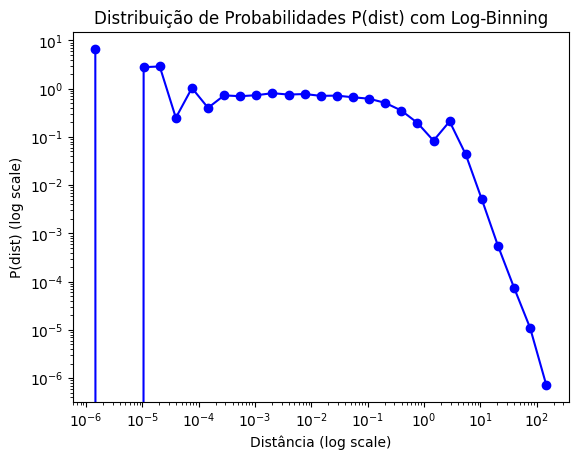

In [33]:
import os
import gzip
import re
import numpy as np
import matplotlib.pyplot as plt

# Defina o caminho para a pasta 'gml'
folder_path = '/home/junior/Downloads/N_320000/dim_1/alpha_a_0.0_alpha_g_2.0/gml'

# Regex para encontrar o valor da distância
distance_pattern = re.compile(r'distance\s([\d\.]+)')

# Lista para armazenar todas as distâncias
all_distances = []

# Itera sobre todos os arquivos na pasta 'gml'
for filename in os.listdir(folder_path):
    if filename.endswith(".gz"):  # Verifica se o arquivo é .gz
        file_path = os.path.join(folder_path, filename)
        
        # Descompacta o arquivo e lê o conteúdo
        try:
            with gzip.open(file_path, 'rt') as file:
                content = file.read()
                
                # Encontra todas as ocorrências de distâncias no arquivo
                distances = distance_pattern.findall(content)
                all_distances.extend([float(d) for d in distances])  # Adiciona as distâncias encontradas
                print(f"{len(distances)} distâncias encontradas no arquivo {filename}")
                
        except Exception as e:
            print(f"Erro ao processar {filename}: {e}")

# Após a leitura, verifica quantas distâncias foram coletadas
print(f"Total de distâncias coletadas: {len(all_distances)}")

# Se distâncias foram encontradas, calculamos a distribuição P(dist) com log-binning
if all_distances:
    # Número de bins logarítmicos
    num_bins = 30

    # Criar bins logarítmicos
    min_dist = min(all_distances)
    max_dist = max(all_distances)
    log_bins = np.logspace(np.log10(min_dist), np.log10(max_dist), num_bins)

    # Contagem dos valores em bins logarítmicos
    counts, bin_edges = np.histogram(all_distances, bins=log_bins, density=True)

    # Calcula os valores centrais de cada bin
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Plota a distribuição de probabilidades P(dist) com escala logarítmica
    plt.plot(bin_centers, counts, marker='o', linestyle='-', color='b')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Distribuição de Probabilidades P(dist) com Log-Binning')
    plt.xlabel('Distância (log scale)')
    plt.ylabel('P(dist) (log scale)')
    #plt.grid(True, which="both", ls="--")
    plt.show()
else:
    print("Nenhuma distância foi encontrada.")


In [37]:
import pandas as pd
from collections import Counter
import re
import gzip
import numpy as np


def drop_zeros(a_list):
    return [i for i in a_list if i>0]

def log_binning(N, dim, alpha_a, alpha_g, counter_dict, bin_count, save):

    max_x = np.log10(max(list(counter_dict.keys())))
    max_y = np.log10(max(list(counter_dict.values())))
    max_base = max([max_x,max_y])

    min_x = np.log10(min(drop_zeros(list(counter_dict.keys()))))

    bins = np.logspace(min_x,max_base,num=bin_count)

    # Based off of: http://stackoverflow.com/questions/6163334/binning-data-in-python-with-scipy-numpy
    Pk = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.values()), density = True)[0] / np.histogram(list(counter_dict.keys()),bins)[0])*np.diff(bins)
    k = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.keys()))[0] / np.histogram(list(counter_dict.keys()),bins)[0])

    k = [x for x in k if str(x) != 'nan']
    Pk = [x for x in Pk if str(x) != 'nan']
    
    if(save==True):
        distri_dataframe = pd.DataFrame(data={"k":k,"pk":Pk})
        distri_dataframe['pk'] = distri_dataframe['pk'].apply(lambda x: format(x, '.2e'))
        distri_dataframe.to_csv(f"../../data/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/all_files/distri_log_all.csv",mode="w",index=False)
        return k,Pk
    else:
        return k,Pk

99999 distâncias encontradas no arquivo ../../data/N_100000/dim_1/alpha_a_0.00_alpha_g_2.00/gml/gml_1653707020.gml.gz


/tmp/ipykernel_12187/1467969988.py:22: RuntimeWarning: invalid value encountered in divide
  Pk = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.values()), density = True)[0] / np.histogram(list(counter_dict.keys()),bins)[0])*np.diff(bins)
/tmp/ipykernel_12187/1467969988.py:23: RuntimeWarning: invalid value encountered in divide
  k = (np.histogram(list(counter_dict.keys()),bins,weights=list(counter_dict.keys()))[0] / np.histogram(list(counter_dict.keys()),bins)[0])


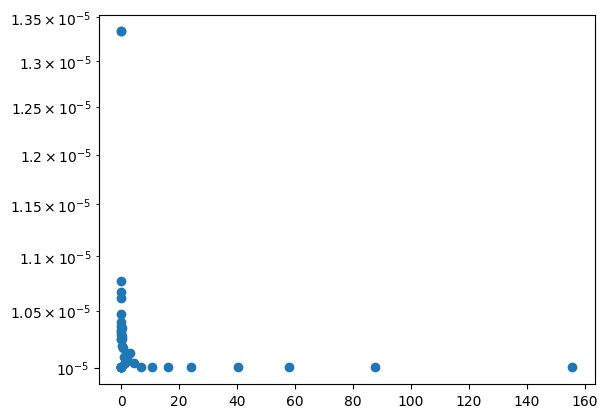

0.004116824745582353


In [40]:
file_path = '../../data/N_100000/dim_1/alpha_a_0.00_alpha_g_2.00/gml/gml_1653707020.gml.gz'
# Regex para encontrar o valor da distância
distance_pattern = re.compile(r'distance\s([\d\.]+)')

# Lista para armazenar todas as distâncias
all_distances = []

with gzip.open(file_path, 'rt') as file:
    content = file.read()

    # Encontra todas as ocorrências de distâncias no arquivo
    distances = distance_pattern.findall(content)
    all_distances.extend([float(d) for d in distances])  # Adiciona as distâncias encontradas
    print(f"{len(distances)} distâncias encontradas no arquivo {file_path}")


# def log_bin_degree_distribution(degrees, num_bins=20):
#     degrees = np.array(degrees)
#     min_degree = np.min(degrees[degrees > 0])  # Ignorar graus zero
#     max_degree = np.max(degrees)
    
#     bins = np.logspace(np.log10(min_degree), np.log10(max_degree), num_bins + 1)
#     hist, edges = np.histogram(degrees, bins=bins, density=False)  # Não normalizar ainda
    
#     bin_centers = np.sqrt(edges[:-1] * edges[1:])  # Média geométrica
#     bin_widths = np.diff(edges)  # Largura dos bins
    
#     # Normalizar a distribuição para garantir que a soma seja 1
#     px = hist / (np.sum(hist) * bin_widths)

#     return bin_centers, px

# Exemplo de uso
#x, px = log_bin_degree_distribution(all_distances)


# plt.loglog(x, px, 'o-', label="Distribuição de graus")
# plt.xlabel("Grau (x)")
# plt.ylabel("p(x)")
# plt.legend()
# plt.show()

N, dim, alpha_a, alpha_g = 1,2,3,4
k, pk = log_binning(N, dim, alpha_a, alpha_g, Counter(all_distances), bin_count=40, save=False)

plt.plot(k, pk, 'o')
plt.yscale("log")
plt.show()
x,px = np.array(k), np.array(pk)
print(np.sum(x*px))
# Se distâncias foram encontradas, calculamos a distribuição P(dist)
# if all_distances:
#     # Cria os bins (intervalos) para as distâncias
#     num_bins = 40
#     counts, bin_edges = np.histogram(all_distances, bins=num_bins, density=True)

#     # Calcula os valores centrais de cada bin
#     bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

#     # Plota a distribuição de probabilidades P(dist)
#     plt.plot(bin_centers, counts, marker='o', linestyle='-', color='b')
#     plt.title('Distribuição de Probabilidades P(dist)')
#     plt.xlabel('Distância')
#     plt.ylabel('P(dist)')
#     plt.xscale("log")
#     plt.yscale("log")
#     plt.grid(True)
#     plt.show()

Soma de p(x): 3.5156263192106385


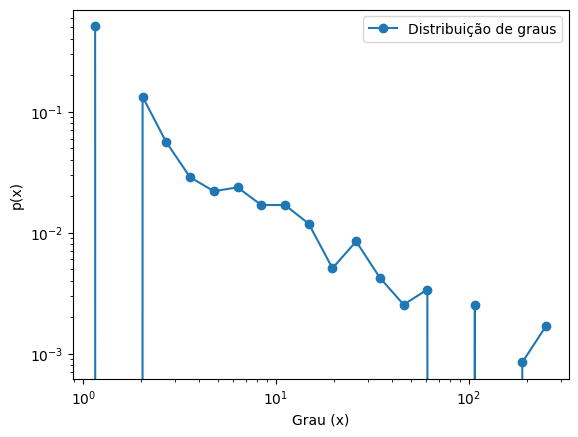

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def log_bin_degree_distribution(degrees, num_bins=20):
    degrees = np.array(degrees)
    min_degree = np.min(degrees[degrees > 0])  # Ignorar graus zero
    max_degree = np.max(degrees)
    
    bins = np.logspace(np.log10(min_degree), np.log10(max_degree), num_bins + 1)
    hist, edges = np.histogram(degrees, bins=bins)
    
    bin_centers = np.sqrt(edges[:-1] * edges[1:])  # Média geométrica
    bin_widths = np.diff(edges)  # Largura dos bins
    
    # Normalizar a distribuição para garantir que a soma seja 1
    px = hist / np.sum(hist * bin_widths)

    return bin_centers, px

# Exemplo de uso
graph_degrees = np.random.zipf(2.0, 1000)  # Gerando graus aleatórios
x, px = log_bin_degree_distribution(graph_degrees)

# Verificando a soma
print(f"Soma de p(x): {np.sum(px*x)}")  # Deve ser aproximadamente 1

plt.loglog(x, px, 'o-', label="Distribuição de graus")
plt.xlabel("Grau (x)")
plt.ylabel("p(x)")
plt.legend()
plt.show()


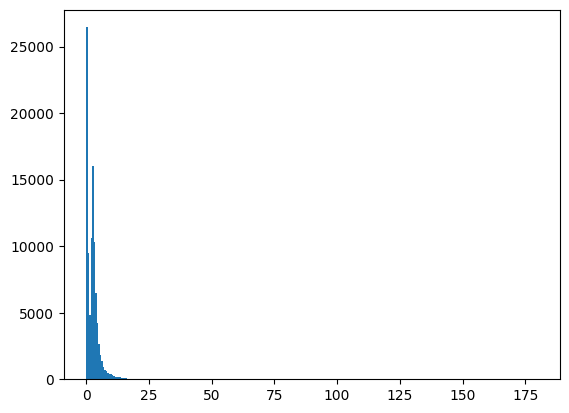

In [24]:
plt.hist(all_distances, bins= 300)
plt.show()